In [34]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [35]:
%matplotlib inline
%pip install yellowbrick

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('dataset2.csv')
data

Note: you may need to restart the kernel to use updated packages.


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62983,18375,5/20/2011,6/5/2013,Female,4,guangzhou,guangdong,CN,25.0,3/31/2014,...,0.0,1134,6/9/2013,297,4.000000,4,1,0.000000,12318,22
62984,36041,3/8/2010,9/14/2013,Male,4,foshan,guangdong,CN,38.0,3/31/2014,...,0.0,8016,1/3/2014,89,37.000000,60,14,0.000000,106972,43
62985,45690,3/30/2006,12/2/2006,Female,4,guangzhou,guangdong,CN,43.0,3/31/2014,...,0.0,2594,3/3/2014,29,166.000000,166,0,0.000000,0,0
62986,61027,2/6/2013,2/14/2013,Female,4,guangzhou,guangdong,CN,36.0,3/31/2014,...,0.0,3934,2/26/2013,400,12.000000,12,0,0.000000,0,0


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [37]:
counts = data.isna().sum().sort_values(ascending=False)

percents = round(data.isna().mean() * 100, 2).sort_values(ascending = False)

null = pd.concat([counts, percents], axis = 1, keys = ['null_counts', '%'])
null

,null_counts,%
WORK_PROVINCE,3248,5.16
WORK_CITY,2269,3.60
SUM_YR_1,551,0.87
AGE,420,0.67
SUM_YR_2,138,0.22
WORK_COUNTRY,26,0.04
GENDER,3,0.00
MEMBER_NO,0,0.00
LAST_FLIGHT_DATE,0,0.00
Points_Sum,0,0.00


In [38]:
data.duplicated().any()

False

In [39]:
nums = data.loc[:, (data.dtypes != object)].columns.tolist()
print(nums)
print(f'Jumlah feature numerikakl : {len(nums)}')

['MEMBER_NO', 'FFP_TIER', 'AGE', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT', 'avg_discount', 'Points_Sum', 'Point_NotFlight']
Jumlah feature numerikakl : 15


In [40]:
cats = data.loc[:, (data.dtypes == object)].columns.tolist()
print(cats)
print(f'Jumlah feature numerikakl : {len(cats)}')

['FFP_DATE', 'FIRST_FLIGHT_DATE', 'GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
Jumlah feature numerikakl : 8


In [41]:
# split data berdasarkan kategori
nums = ['MEMBER_NO', 'AGE', 'FFP_TIER', 'FLIGHT_COUNT', 'BP_SUM', 'SUM_YR_1', 'SUM_YR_2', 'SEG_KM_SUM', 'LAST_TO_END', 'AVG_INTERVAL', 'MAX_INTERVAL', 'EXCHANGE_COUNT',
       'avg_discount', 'Points_Sum', 'Point_NotFlight']
cats = ['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

In [42]:
data[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


In [43]:
data[cats].describe().T

,count,unique,top,freq
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


In [44]:
print(f'% guangdong : {round(17509 / 1165 * 100, 2)}')

% guangdong : 1502.92


In [45]:
for col in cats:
    display(f'Value count kolom {col }: ''')
    print(' '* 50)
    display(data[col].value_counts())
    display()

'Value count kolom GENDER: '

GENDER
Male      48134
Female    14851
Name: count, dtype: int64

'Value count kolom WORK_CITY: '

WORK_CITY
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: count, Length: 3234, dtype: int64

'Value count kolom WORK_PROVINCE: '

WORK_PROVINCE
guangdong        17509
beijing           8014
shanghai          4998
liaoning          4182
xinjiang          2512
                 ...  
YAMAGUCHI-KEN        1
AICHIKEN             1
SOUTU HOLLAND        1
xinxixian            1
JAWATIMUR            1
Name: count, Length: 1165, dtype: int64

'Value count kolom WORK_COUNTRY: '

WORK_COUNTRY
CN    57748
HK      991
JP      875
KR      790
US      575
      ...  
CD        1
BI        1
CM        1
FL        1
GL        1
Name: count, Length: 118, dtype: int64

'Value count kolom FFP_DATE: '

FFP_DATE
1/13/2011     184
1/1/2013      165
3/1/2013      100
11/17/2010     99
1/14/2011      95
             ... 
10/4/2005       1
5/18/2009       1
11/29/2004      1
11/7/2004       1
5/19/2009       1
Name: count, Length: 3068, dtype: int64

'Value count kolom FIRST_FLIGHT_DATE: '

FIRST_FLIGHT_DATE
2/16/2013    96
9/30/2012    85
2/15/2013    84
9/9/2005     78
4/21/2012    70
             ..
3/2/2005      1
4/12/2009     1
2/20/2005     1
1/27/2005     1
12/7/2004     1
Name: count, Length: 3406, dtype: int64

'Value count kolom LOAD_TIME: '

LOAD_TIME
3/31/2014    62988
Name: count, dtype: int64

'Value count kolom LAST_FLIGHT_DATE: '

LAST_FLIGHT_DATE
3/31/2014    959
3/30/2014    933
3/28/2014    924
3/29/2014    779
3/27/2014    767
            ... 
4/14/2012      6
4/6/2012       3
4/2/2012       3
4/4/2012       3
4/1/2012       1
Name: count, Length: 731, dtype: int64

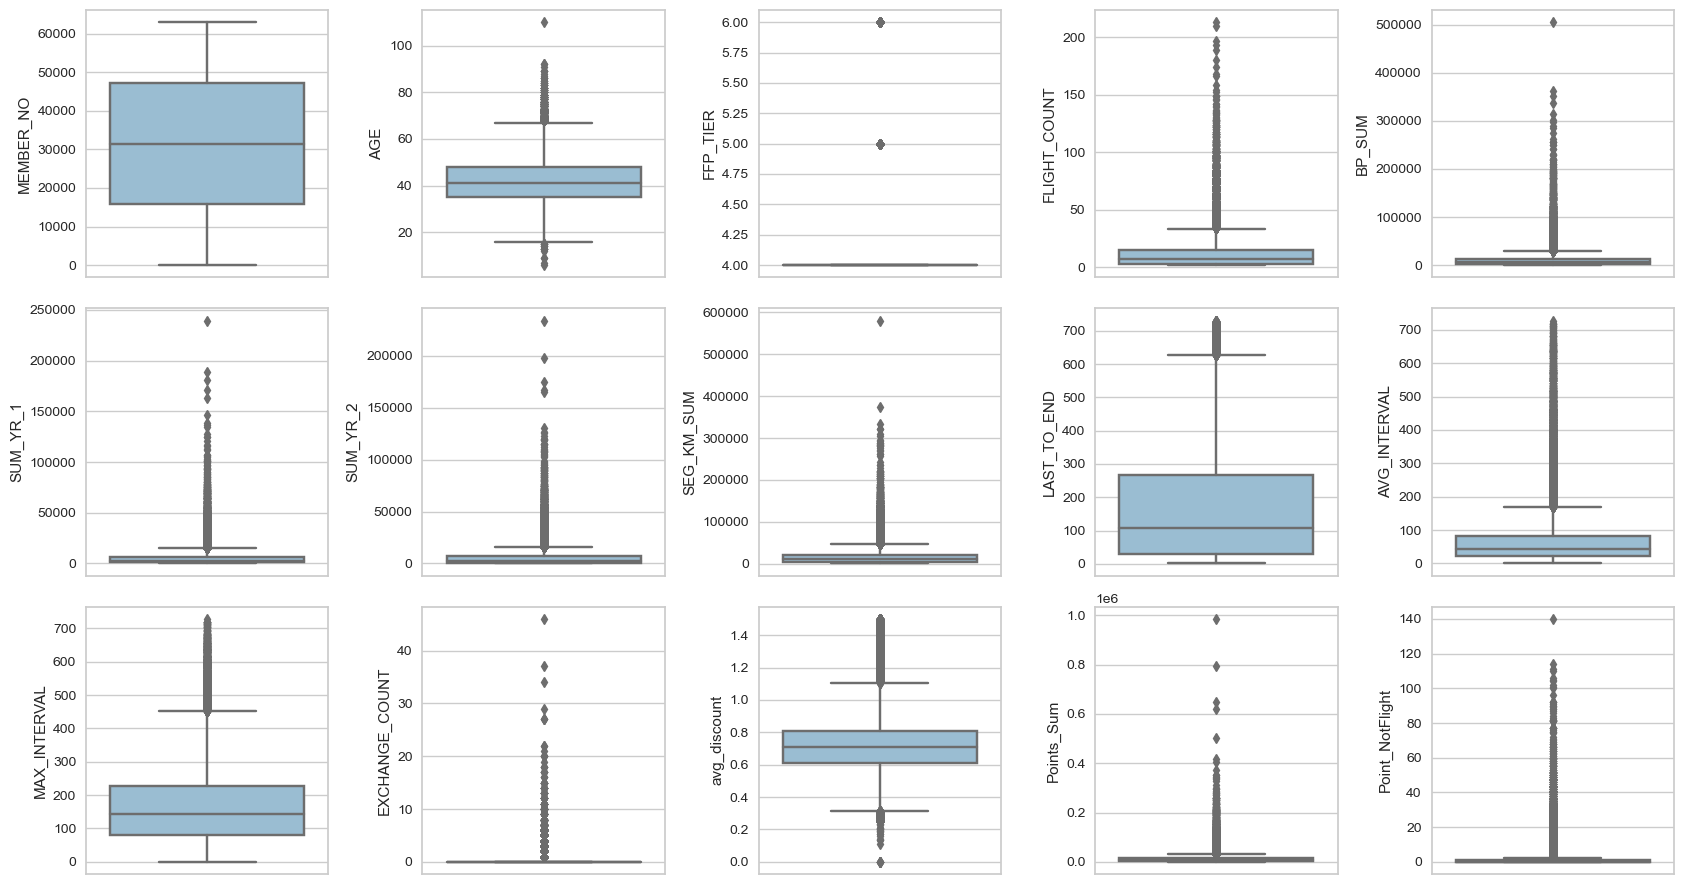

In [46]:
import seaborn as sns
plt.figure(figsize = (17,9))
for i in range(0,len(nums)):
    plt.subplot(3, 5, i+1)
    sns.boxplot(y = data[nums[i]], color = "#91bfdb", orient = 'v')
    plt.tight_layout()

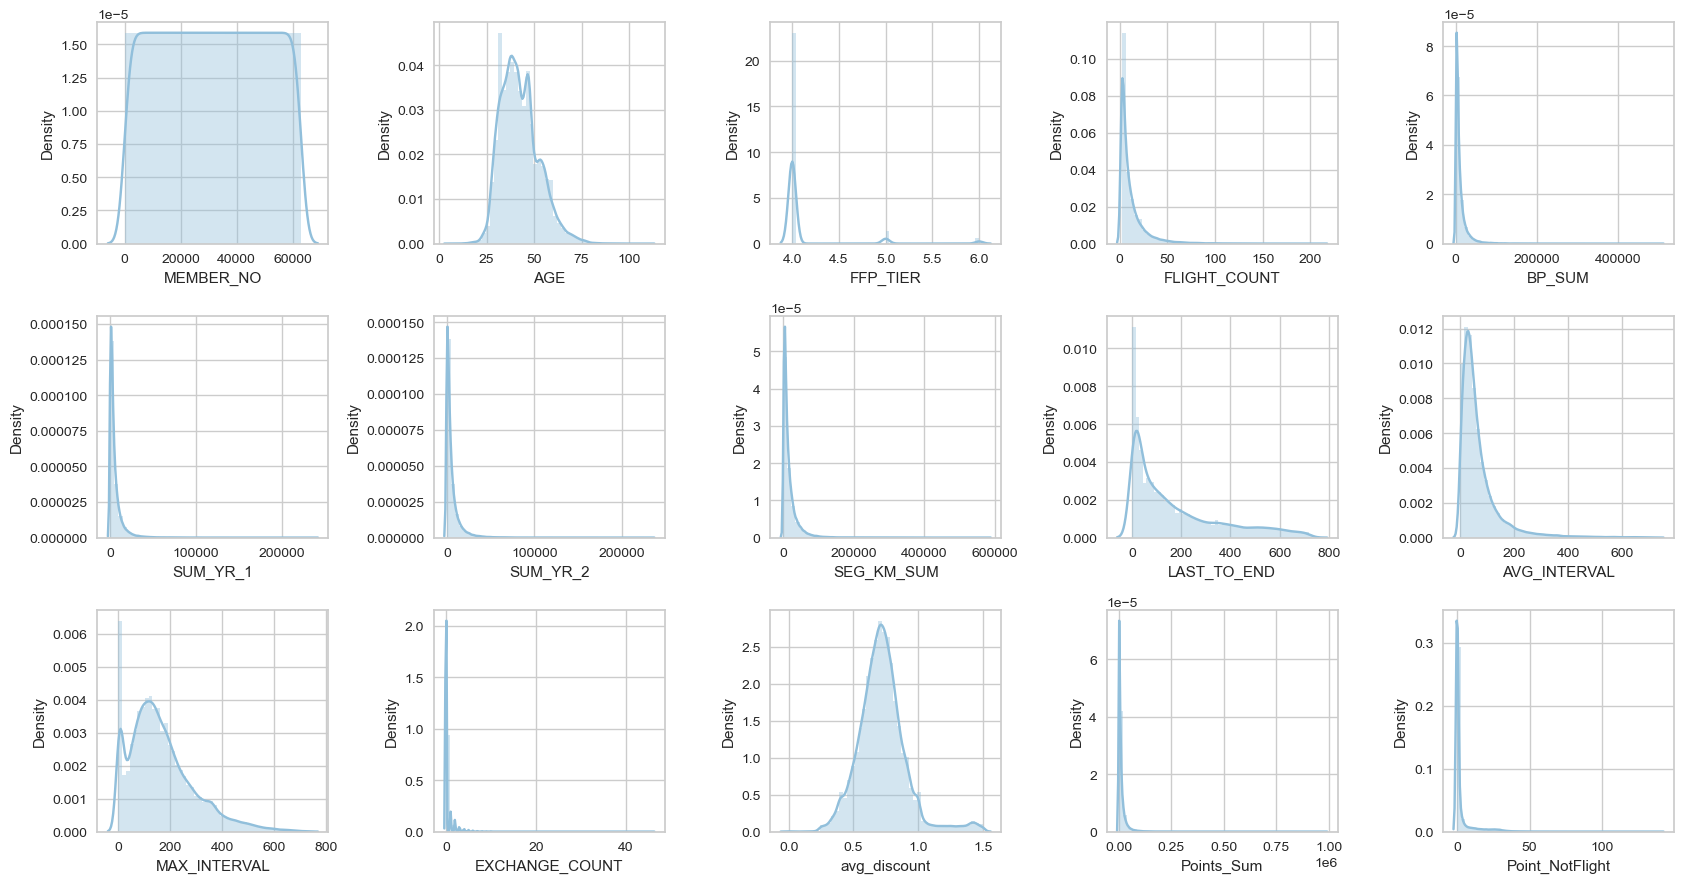

In [47]:
import seaborn as sns
plt.figure(figsize = (17,9))
for i in range(0,len(nums)):
    plt.subplot(3, 5, i+1)
    sns.distplot(data[nums[i]], color = "#91bfdb")
    plt.tight_layout()

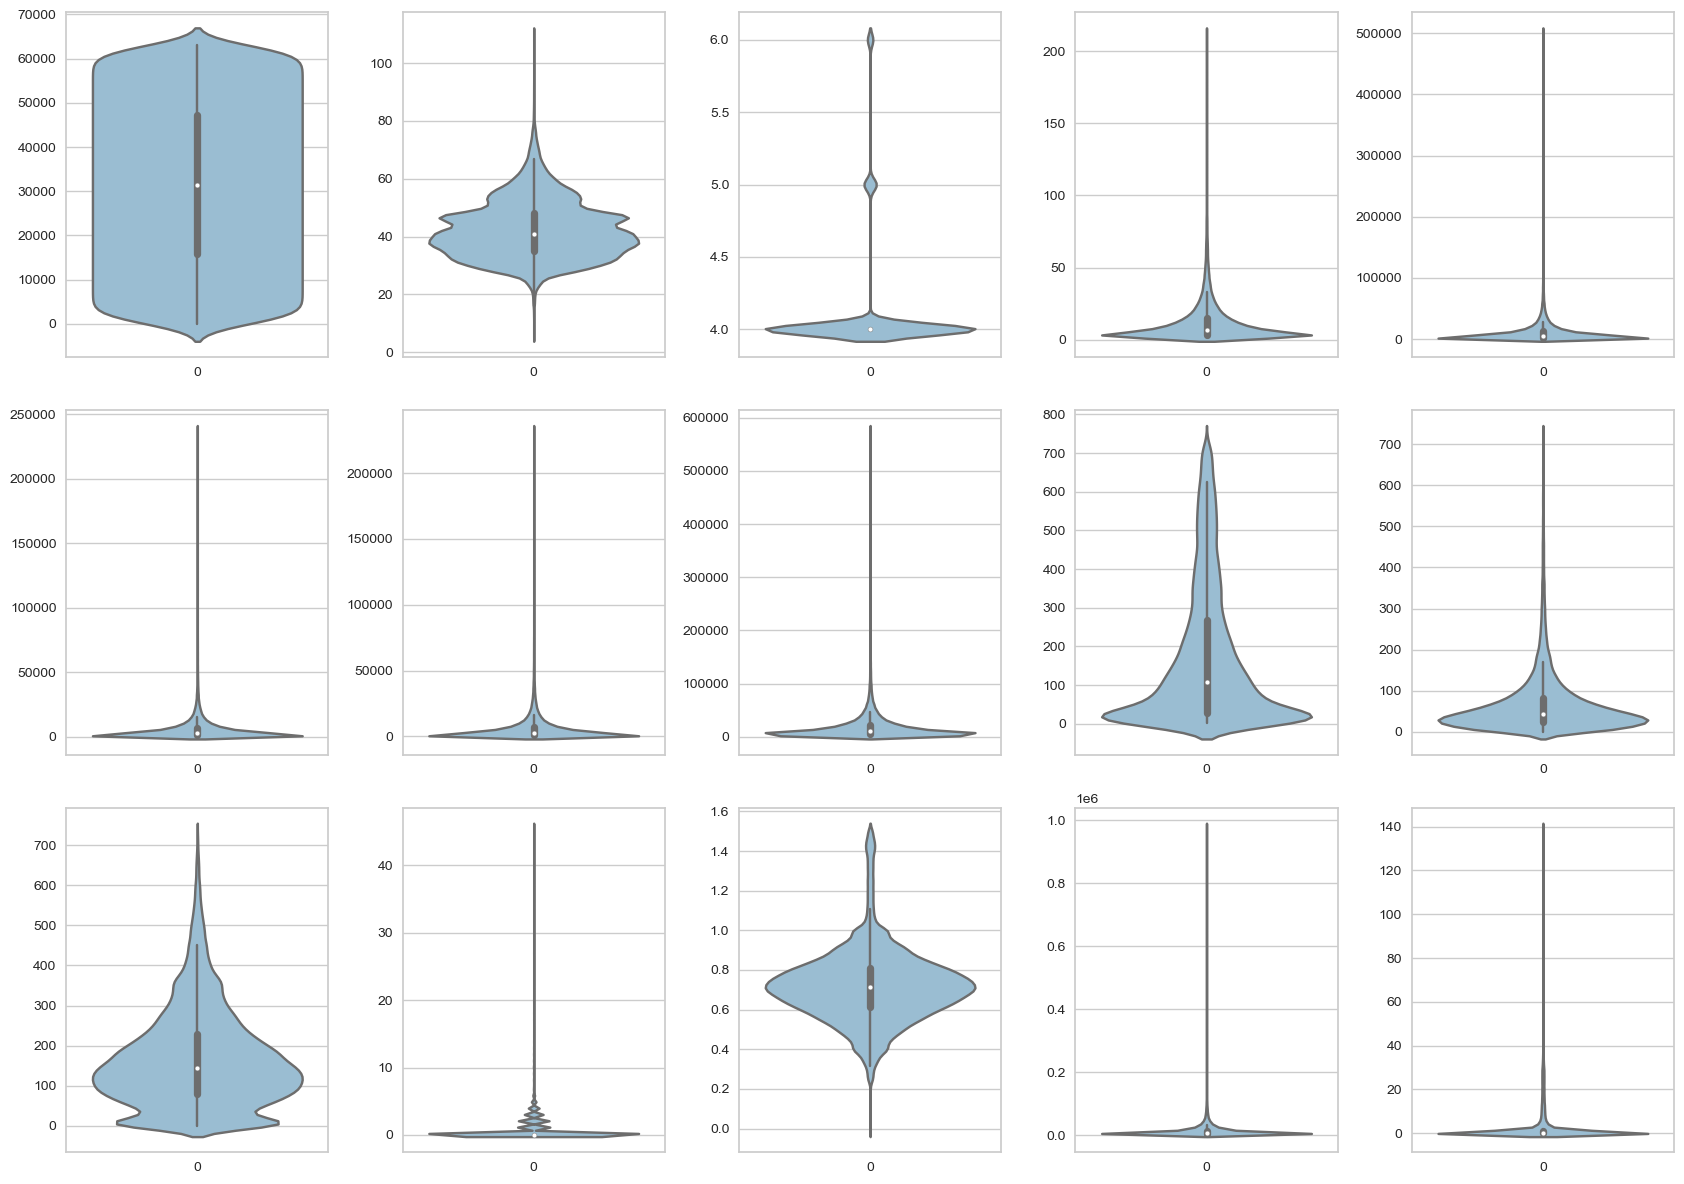

In [48]:
import seaborn as sns
plt.figure(figsize = (17,12))
for i in range(0,len(nums)):
    plt.subplot(3, 5, i+1)
    sns.violinplot(data[nums[i]], color = "#91bfdb")
    plt.tight_layout()

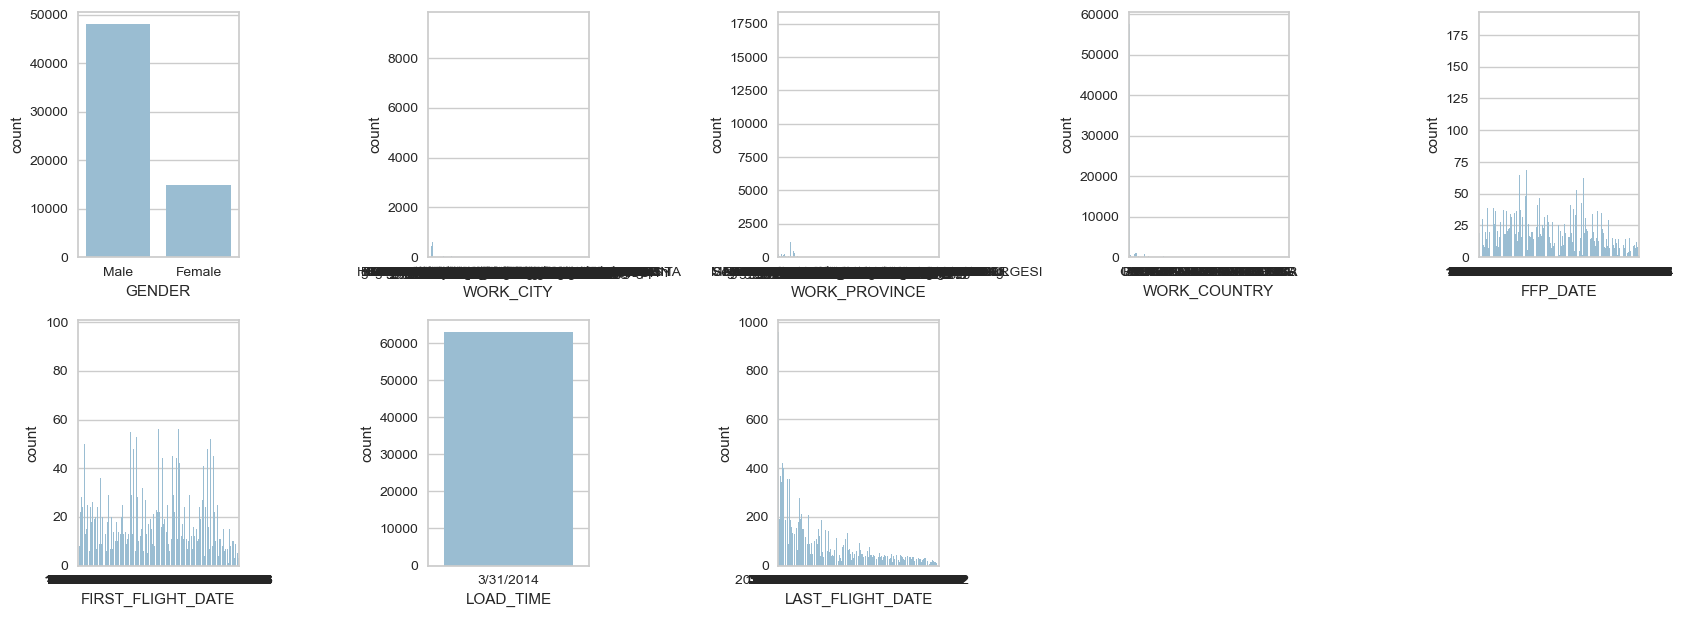

In [49]:
import seaborn as sns
plt.figure(figsize = (17,9))
for i in range(0,len(cats)):
    plt.subplot(3, 5, i+1)
    sns.countplot(x = data[cats[i]], color = "#91bfdb")
    plt.tight_layout()

Text(0, 0.5, 'count')

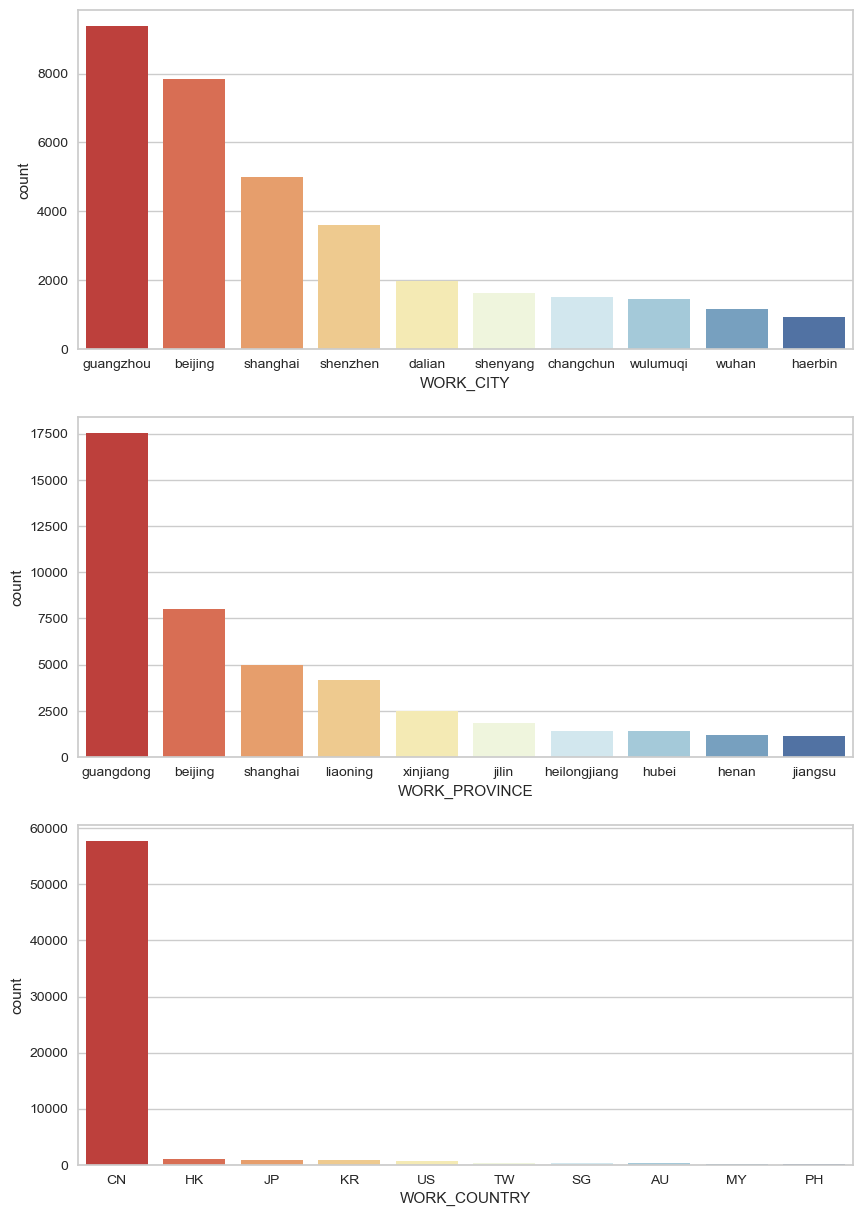

In [50]:
# membuat grafik dengan format 3 rows dengan 1 kolom
fig, ax = plt.subplots(nrows=3,ncols=1,figsize=(10,15))

# work_city
# mengambil jumlah kota dengan user 10 terbanyak
work_city_top10 = data['WORK_CITY'].value_counts().head(10)
# membuat visualisasi dalam bentuk bar
sns.barplot(x=work_city_top10.index,y=work_city_top10.values,ax=ax[0], palette=('RdYlBu'))
ax[0].set_xlabel('WORK_CITY')
ax[0].set_ylabel('count')

# work_province
# mengambil jumlah province dengan user 10 terbanyak
work_province_top10 = data['WORK_PROVINCE'].value_counts().head(10)
# membuat visualisasi dalam bentuk bar
sns.barplot(x=work_province_top10.index,y=work_province_top10.values,ax=ax[1], palette=('RdYlBu'))
ax[1].set_xlabel('WORK_PROVINCE')
ax[1].set_ylabel('count')

# work_country
# mengambil jumlah country dengan user 10 terbanyak
work_country_top10 = data['WORK_COUNTRY'].value_counts().head(10)
# membuat visualisasi dalam bentuk bar
sns.barplot(x=work_country_top10.index,y=work_country_top10.values,ax=ax[2], palette=('RdYlBu'))
ax[2].set_xlabel('WORK_COUNTRY')
ax[2].set_ylabel('count')

Text(0.5, 0, 'FIRST FLIGHT DATE YEAR')

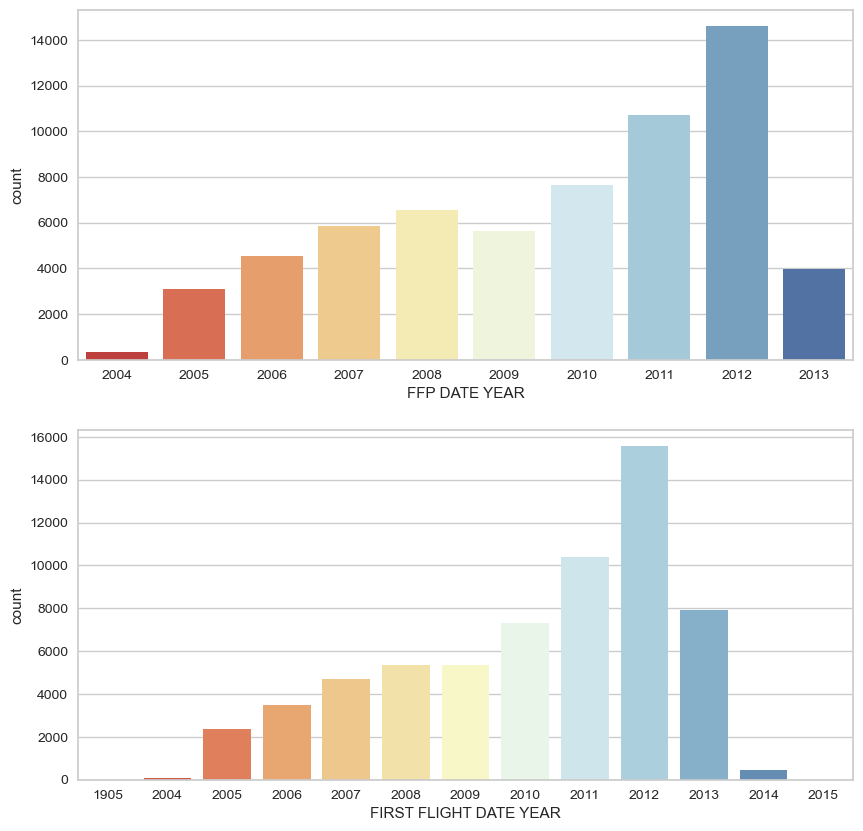

In [51]:
# membuat grafik dengan format 2 rows dengan 1 kolom
fig, ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10))

# FFP
# mengubah tipe object ke datetime
FFP = pd.to_datetime(data['FFP_DATE']).dt.year
# visualisasi
sns.countplot(x=FFP,ax=ax[0], palette=('RdYlBu'))
ax[0].tick_params(axis='x')
ax[0].set_xlabel('FFP DATE YEAR')

# FFD
# mengubah tipe object ke datetime
FFD = pd.to_datetime(data['FIRST_FLIGHT_DATE']).dt.year
# visualisasi
sns.countplot(x=FFD, ax=ax[1], palette=('RdYlBu'))
ax[1].tick_params(axis='x')
ax[1].set_xlabel('FIRST FLIGHT DATE YEAR')

In [52]:
df_last = data.copy()

# drop data yang memilik tanggal 2014/2/29
df_last.drop(df_last[df_last.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

Text(0.5, 0, 'LAST FLIGHT DATE YEAR')

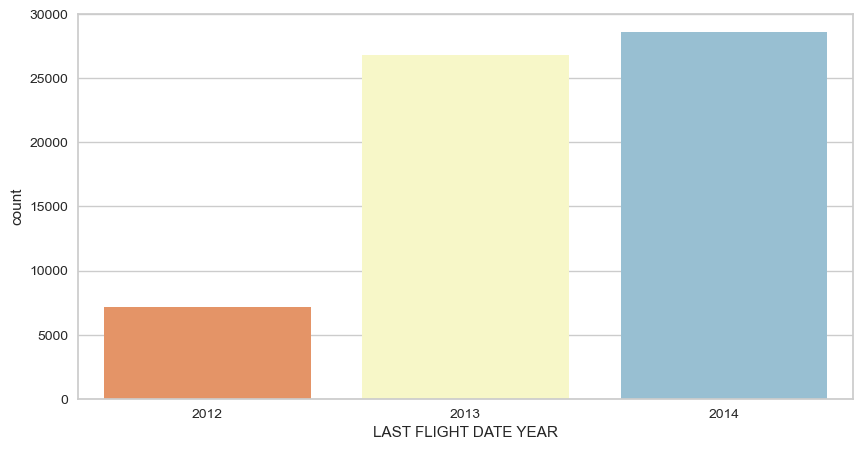

In [53]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
# mengubah tipe object ke datetime
LFD = pd.to_datetime(df_last['LAST_FLIGHT_DATE']).dt.year
# visualisasi
sns.countplot(x=LFD, palette='RdYlBu')
ax.set_xlabel('LAST FLIGHT DATE YEAR')

In [54]:
data_feature = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

df = data.copy()

In [55]:
for col in data_feature:
    data[col] = pd.to_datetime(data[col], errors='coerce')

In [56]:
from sklearn.preprocessing import LabelEncoder

l = LabelEncoder()
for i in data.columns:
    if data[i].dtype == 'object':
        data[i]=l.fit_transform(data[i])

In [57]:
data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,1,6,5,842,24,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,28065,2007-02-19,2007-08-03,1,6,3234,842,24,42.0,2014-03-31,...,167434.0,293678,2014-03-25,7,5.194245,17,29,1.252314,415768,33
2,55106,2007-02-01,2007-08-30,1,6,5,842,24,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
3,21189,2008-08-22,2008-08-23,1,5,898,102,104,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
4,39546,2009-04-10,2009-04-15,1,6,2102,926,24,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39


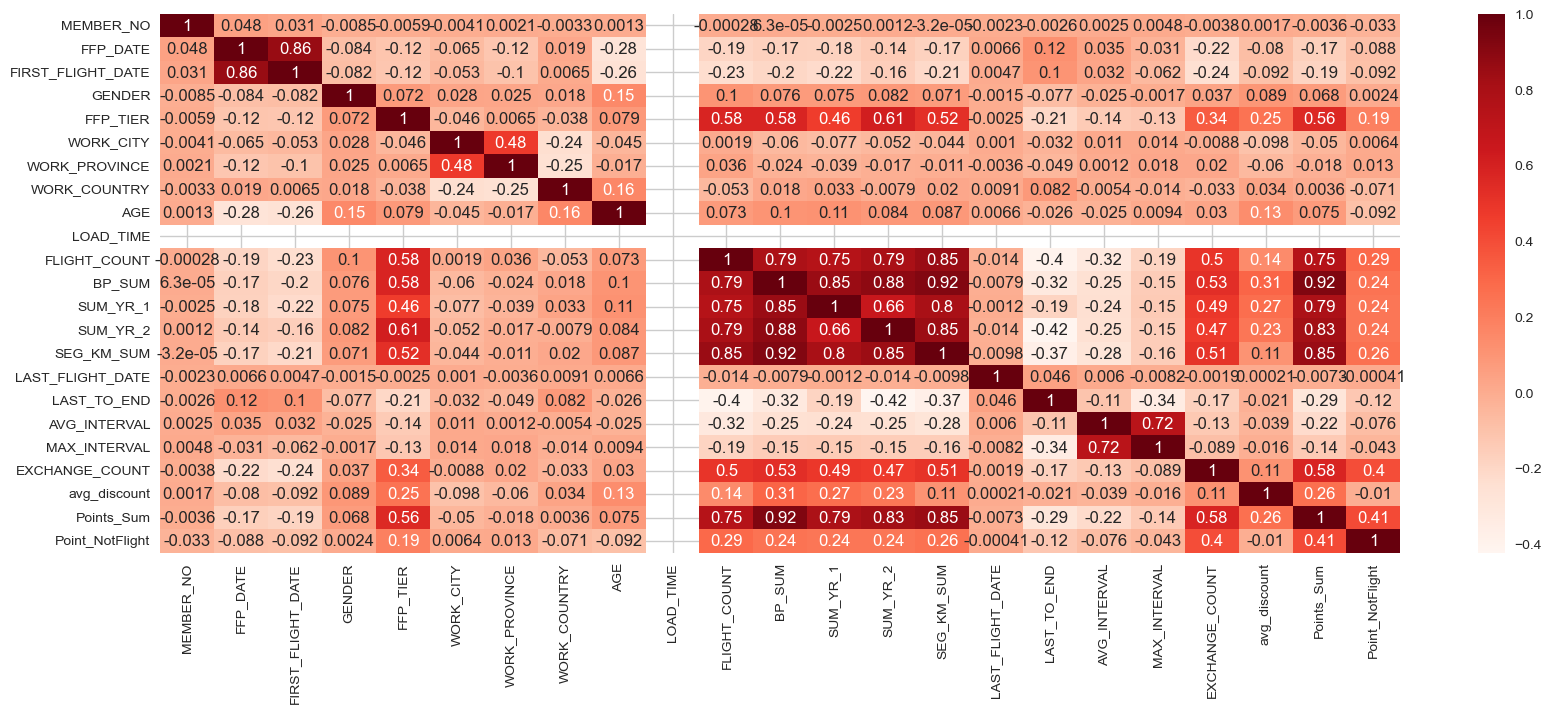

In [58]:
plt.figure(figsize = (20,7))
sns.heatmap(data.corr(), annot=True, cmap='Reds')
plt.show()

In [59]:
df_pre = df.drop(columns=['MEMBER_NO', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY', 'AGE', 'GENDER']).copy()

In [60]:
df_pre.drop(df_pre[df_pre.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

In [61]:
for col in data_feature:
    df_pre[col] = pd.to_datetime(df_pre[col], errors='coerce')

In [62]:
df_pre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62567 entries, 0 to 62987
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   FFP_DATE           62567 non-null  datetime64[ns]
 1   FIRST_FLIGHT_DATE  62567 non-null  datetime64[ns]
 2   FFP_TIER           62567 non-null  int64         
 3   LOAD_TIME          62567 non-null  datetime64[ns]
 4   FLIGHT_COUNT       62567 non-null  int64         
 5   BP_SUM             62567 non-null  int64         
 6   SUM_YR_1           62016 non-null  float64       
 7   SUM_YR_2           62429 non-null  float64       
 8   SEG_KM_SUM         62567 non-null  int64         
 9   LAST_FLIGHT_DATE   62567 non-null  datetime64[ns]
 10  LAST_TO_END        62567 non-null  int64         
 11  AVG_INTERVAL       62567 non-null  float64       
 12  MAX_INTERVAL       62567 non-null  int64         
 13  EXCHANGE_COUNT     62567 non-null  int64         
 14  avg_discoun

In [63]:
df_pre.isna().sum()

FFP_DATE               0
FIRST_FLIGHT_DATE      0
FFP_TIER               0
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1             551
SUM_YR_2             138
SEG_KM_SUM             0
LAST_FLIGHT_DATE       0
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64